# Lab Six: Convolutional Network Architectures

## 1. Preparation

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
"""
Read in your images as numpy arrays. Resize and recolor images as necessary. 
"""
normal_images = []
pneumonia_images = []

image_size = (200, 200)

normal_path = "./chest_xray/train/NORMAL/" 
pneumonia_path = "./chest_xray/train/PNEUMONIA/"
  
normal_dir = os.fsencode(normal_path)
pneumonia_dir = os.fsencode(pneumonia_path)

# loop through all NORMAL images, convert to numpy array, store in normal_images
for file in os.listdir(normal_dir):
    file_str = normal_path + str(file)[2:-1]
    if file_str.endswith(".jpeg"):
        img = Image.open(file_str)
        img = img.resize(image_size)
        normal_images.append(np.asarray(img))
        
        
# loop through all PNEUMONIA images, convert to numpy array, store in pneumonia_images
for file in os.listdir(pneumonia_dir):
    file_str = pneumonia_path + str(file)[2:-1]
    if file_str.endswith(".jpeg"):
        img = Image.open(file_str)
        img = img.resize(image_size)
        np_shape = np.asarray(img)
        if np_shape.ndim == 3:
            np_shape = np_shape[:, :, 0]
        pneumonia_images.append(np_shape)
        
normal_path = "./chest_xray/test/NORMAL/" 
pneumonia_path = "./chest_xray/test/PNEUMONIA/"
normal_dir = os.fsencode(normal_path)
pneumonia_dir = os.fsencode(pneumonia_path)
# loop through all NORMAL images, convert to numpy array, store in normal_images
for file in os.listdir(normal_dir):
    file_str = normal_path + str(file)[2:-1]
    if file_str.endswith(".jpeg"):
        img = Image.open(file_str)
        img = img.resize(image_size)
        normal_images.append(np.asarray(img))
        
        
# loop through all PNEUMONIA images, convert to numpy array, store in pneumonia_images
for file in os.listdir(pneumonia_dir):
    file_str = pneumonia_path + str(file)[2:-1]
    if file_str.endswith(".jpeg"):
        img = Image.open(file_str)
        img = img.resize(image_size)
        np_shape = np.asarray(img)
        if np_shape.ndim == 3:
            np_shape = np_shape[:, :, 0]
        pneumonia_images.append(np_shape)
        
print(len(normal_images)) # how many normal images do we have? 
print(len(pneumonia_images)) # how many pneumonia images do we have? 
print(type(normal_images[0]))
print(type(pneumonia_images[0]))
print(type(normal_images[-1]))
print(type(pneumonia_images[-1]))
print(type(normal_images))
print(type(pneumonia_images))

1575
4265
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [3]:
print(normal_images.shape)
print(pneumonia_images.shape)

AttributeError: 'list' object has no attribute 'shape'

In [5]:
df = pd.DataFrame()

for normal_image in normal_images:
    flat = np.asarray(normal_image).flatten()
    flat = flat.transpose()
    temp_df = pd.DataFrame(flat.reshape(1,-1))
    temp_df = temp_df.assign(case = 0)
    df = pd.concat([df, temp_df])
    
for pneumonia_image in pneumonia_images:
    flat = np.asarray(pneumonia_image).flatten()
    flat = flat.transpose()
    temp_df = pd.DataFrame(flat.reshape(1,-1))
    temp_df = temp_df.assign(case = 1)
    df = pd.concat([df, temp_df])
    
print(df)

      0    1   2   3    4    5    6    7    8    9  ...  39991  39992  39993  \
0    22   20  18  17   18   47   59   62   67   72  ...    101    103    104   
0    15   23  28  31   35   36   41   47   48   49  ...      0      0      0   
0     0    0   0  13   23   30   35   42   45   49  ...      0      0      0   
0    40   45  49  54   57   60   66   75   77   81  ...      6      8      9   
0    77   72  64  55   46   36   29   25   24   22  ...      0      0      0   
..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
0    35   33  47  40   32   44   39   42  154  115  ...     25     25     25   
0   162  123  95  72   51   26   18   21   14   11  ...     19     22     23   
0    22   17  15   4  108  219  212  181  102   38  ...     32     32     33   
0   217  162  49  53   51   53   55   57   58   59  ...     20     21     21   
0     9   14  17  20   24   25   28   30   35   41  ...      0      0      0   

    39994  39995  39996  39997  39998  

In [6]:
images = np.concatenate((normal_images, pneumonia_images))
print(images.shape)

X = images.reshape((len(images), 200 * 200))
X = X.reshape((X.shape[0], 1, 200, 200))
y = df['case']

print(X.shape)
y = y.to_numpy()
print(type(y))

(5840, 200, 200)
(5840, 1, 200, 200)
<class 'numpy.ndarray'>


#### Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

#### Split data using Stratified Shuffle Split with 10-fold cross validation

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)

for test, train in cv.split(X,y):
    X_train = X[train]
    y_train = y[train]
  
    X_test = X[test]
    y_test = y[test]
    
    
print('Training:', X_train.shape)
print('Test:',X_test.shape)
print('Number of classes in Training:', np.unique(y_train, return_counts=True)[1]) #glioma/meningioma/no/pituitary
print('Number of classes in Test:', np.unique(y_test, return_counts=True)[1])

Training: (1168, 1, 200, 200)
Test: (4672, 1, 200, 200)
Number of classes in Training: [315 853]
Number of classes in Test: [1260 3412]


## 2. Modelling

#### 2.1 Setup the training to use data expansion in Keras (also called data augmentation). Explain why the chosen data expansion techniques are appropriate for your dataset. You can use the keras ImageGenerator as a pre-processing step OR in the optimization loop. You can also use the Keras-cv augmenter

Labels
- 0 -> Normal 
- 1 -> Pneumonia

In [8]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Reshape, Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, average
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [9]:
X_train = X_train / 1.0 - 0.5
X_test = X_test / 1.0 - 0.5

img_wh = 200

X_train = np.expand_dims(X_train.reshape((-1, 200, 200)), axis=3)
X_test = np.expand_dims(X_test.reshape((-1, 200, 200)), axis=3)

y_train_new = keras.utils.to_categorical(y_train, 2)
y_test_new = keras.utils.to_categorical(y_test, 2)

print(f'New Shape: Rows: {X_train.shape[0]}, ' + 
      f'image size: ({X_train.shape[1]},{X_train.shape[2]},{ X_train.shape[3]})')

New Shape: Rows: 1168, image size: (200,200,1)


In [10]:
data_generator = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 5, # used, Int. Degree range for random rotations.
    width_shift_range = 0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range = 0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range = 0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range = 0.,
    channel_shift_range = 0.,
    fill_mode = 'nearest',
    cval = 0.,
    horizontal_flip = True,
    vertical_flip = False,
    rescale = None
)

data_generator.fit(X_train)

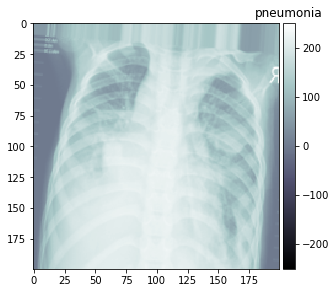

In [11]:
from skimage.io import imshow

tmps = data_generator.flow(X_train, y_train_new, batch_size=1)
labels = ['normal', 'pneumonia']


for tmp in tmps:
    imshow(tmp[0].squeeze(),cmap='bone')
    plt.title(labels[np.argmax(tmp[1])])
    break

#### 2.2 Create a convolutional neural network to use on your data using Keras. Investigate at least two different convolutional network architectures (and investigate changing some parameters of each architecture such as the number of filters--at minimum have two variations of each network for a total of four models trained). Use the method of train/test splitting and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). Be sure that models converge. 

## 2.1. Create a convolutional neural network

### Model1_Alex

The first model contains the following features:
- 16, 32, 64, and 128 filters, respectively, in the four convolution layers
- 3x3 kernel size
- 3x3 kernel size
- 2x2 max pooling
- 128 neurons in the first two dense layers

In [51]:
Model1_Alex = Sequential(name='Model1_Alex')

Filt_layers = [16,32, 64, 128]
for Filters in Filt_layers:
    Model1_Alex.add(Conv2D(filters=Filters,
                        kernel_size=(3,3),
                        padding='same',
                        data_format='channels_last',
                        input_shape=(200,200,1),
                        activation='linear')) 
    Model1_Alex.add(Conv2D(filters=Filters,
                        kernel_size=(3,3),
                        padding='same',
                        data_format='channels_last',
                        input_shape=(200,200,1),
                        activation='relu'))
    Model1_Alex.add(Conv2D(filters=Filters,
                        kernel_size=(3,3),
                        padding='same',
                        data_format='channels_last',
                        input_shape=(200,200,1),
                        activation='relu'))
    Model1_Alex.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last'))
    
Model1_Alex.add(Flatten())
Model1_Alex.add(Dense(128, activation='relu'))
Model1_Alex.add(Dense(128, activation='relu'))
Model1_Alex.add(Dense(2, activation='softmax'))

Model1_Alex.summary()

Model: "Model1_Alex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 200, 200, 16)      160       
                                                                 
 conv2d_52 (Conv2D)          (None, 200, 200, 16)      2320      
                                                                 
 conv2d_53 (Conv2D)          (None, 200, 200, 16)      2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 conv2d_55 (Conv2D)          (None, 100, 100, 32)      9248      
                                                       

In [ ]:
import tensorflow as tf

Model1_Alex.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', tf.keras.metrics.Recall()])

# the flow method yields batches of images indefinitely, with the given transofmrations
Model1_histories = []
temp2 = Model1_Alex.fit_generator(data_generator.flow(X_train, y_train_new, batch_size=16), 
                      steps_per_epoch=int(len(X_train)/16), # how many generators to go through per epoch
                      epochs=30, verbose=1,
                      validation_data=(X_test,y_test_new)#,
                      #callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Model1_histories.append(temp2)

Epoch 1/30


C:\Users\mahsa\AppData\Local\Temp\ipykernel_10048\1274273145.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  temp2 = Model1_Alex.fit_generator(data_generator.flow(X_train, y_train_new, batch_size=16),


73/73 [==============================] - 319s 4s/step - loss: 0.3926 - accuracy: 0.8382 - recall_9: 0.8382 - val_loss: 0.4834 - val_accuracy: 0.7806 - val_recall_9: 0.7806
Epoch 2/30
34/73 [============>.................] - ETA: 1:07 - loss: 0.4612 - accuracy: 0.8235 - recall_9: 0.8235

In [42]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

labels = ['normal', 'pneumonia']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

146/146 [==============================] - 92s 632ms/step


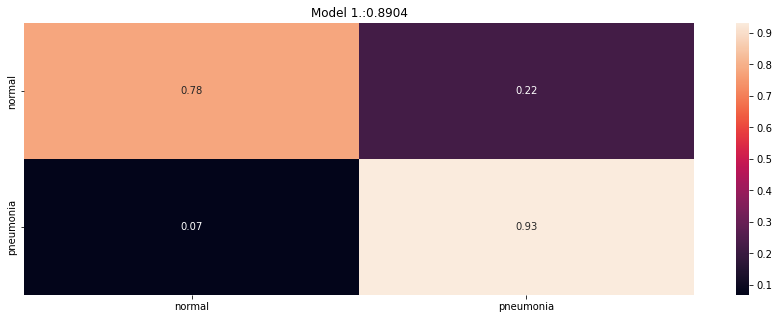

In [43]:
summarize_net(Model1_Alex, X_test, y_test, title_text='Model 1.:')

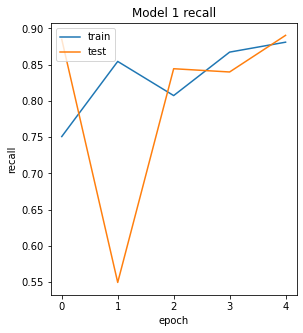

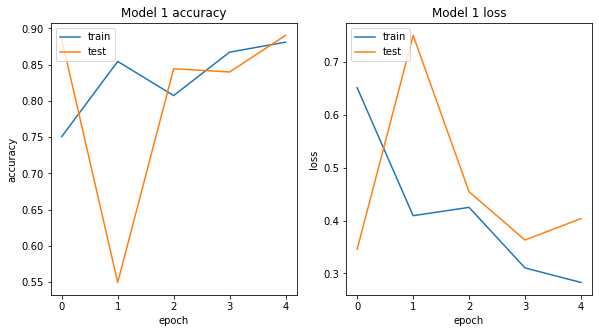

In [41]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline

# combine all the history from training together
combined1 = dict()
for key in ['recall_2','val_recall_2','accuracy','val_accuracy','loss','val_loss']:
    combined1[key] = np.hstack([x.history[key] for x in histories2])

# summarize history for recall
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(combined1['recall_2'])
plt.plot(combined1['val_recall_2'])
plt.title('Model 1 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.plot(combined1['accuracy'])
plt.plot(combined1['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(133)
plt.plot(combined1['loss'])
plt.plot(combined1['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model 2 (AlexNet 2)

The second model constains the following parameters:

- 64, 128, and 256 filters, respectively, in the three convolution layers
- 3x3 kernel size
- 3x3 max pooling
- 128,256 neurons in the first two dense layers

In [ ]:
Model2_Alex = Sequential(name='Model2_Alex')

num_filt_layers = [64,64, 128, 256]
for num_filters in num_filt_layers:
    Model2_Alex.add(Conv2D(filters=num_filters,
                        kernel_size=(3,3),
                        padding='same',
                        data_format='channels_last',
                        input_shape=(200,200,1),
                        activation='linear')) 
    Model2_Alex.add(Conv2D(filters=num_filters,
                        kernel_size=(3,3),
                        padding='same',
                        data_format='channels_last',
                        input_shape=(200,200,1),
                        activation='relu'))
    Model2_Alex.add(Conv2D(filters=num_filters,
                        kernel_size=(3,3),
                        padding='same',
                        data_format='channels_last',
                        input_shape=(200,200,1),
                        activation='relu'))
    Model2_Alex.add(MaxPooling2D(pool_size=(3,3), data_format='channels_last'))
    
Model2_Alex.add(Flatten())
Model2_Alex.add(Dense(128, activation='relu'))
Model2_Alex.add(Dense(256, activation='relu'))
Model2_Alex.add(Dense(2, activation='softmax'))
Model2_Alex.summary()


In [ ]:
import tensorflow as tf

Model2_Alex.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', tf.keras.metrics.Recall()])

# the flow method yields batches of images indefinitely, with the given transofmrations
Model2_histories = []
temp2 = Model2_Alex.fit_generator(data_generator.flow(X_train, y_train_new, batch_size=16), 
                      steps_per_epoch=int(len(X_train)/16), # how many generators to go through per epoch
                      epochs=30, verbose=1,
                      validation_data=(X_test,y_test_new)#,
                      #callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Model2_histories.append(temp2)

In [ ]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

labels = ['normal', 'pneumonia']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

In [ ]:
summarize_net(Model2_Alex, X_test, y_test, title_text='Model 2.:')

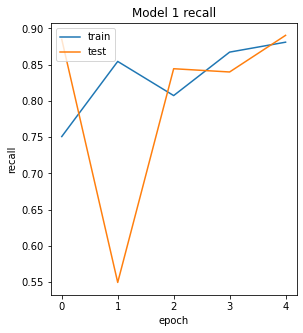

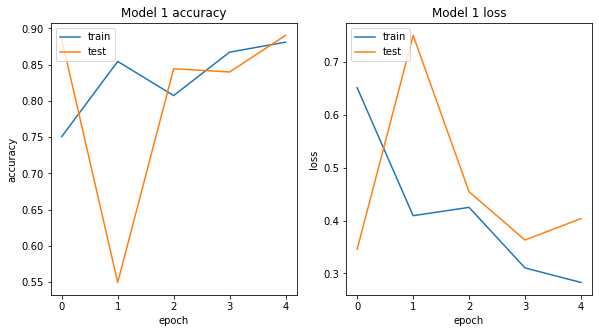

In [41]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline

# combine all the history from training together
combined1 = dict()
for key in ['recall_4','val_recall_4','accuracy','val_accuracy','loss','val_loss']:
    combined1[key] = np.hstack([x.history[key] for x in Model2_histories])

# summarize history for recall
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(combined1['recall_4'])
plt.plot(combined1['val_recall_4'])
plt.title('Model 2 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.plot(combined1['accuracy'])
plt.plot(combined1['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(133)
plt.plot(combined1['loss'])
plt.plot(combined1['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model3_Res

The third model contains following parameters:

- 32 filters in both of the first convolution layers
- 64, 32, 32 filters in the four bypassed convolution layers
- 3x3 kernel size in the first two convolution layers as well as the middle bypassed layer
- 1x1 kernel size in the first and last bypassed layers
- 2x2 max pooling
- 128 neurons in the first dense layer

In [49]:
from tensorflow.keras.layers import Add, Input

lambdaReg = 0.000001
input_holder = Input(shape=(200,200,1))

x = Conv2D(filters=32,
           input_shape=(200,200,1),
           kernel_size=(3,3),
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(lambdaReg),
           padding='same',
           activation='relu',
           data_format='channels_last')(input_holder)

x = MaxPooling2D(pool_size=(2,2), data_format='channels_last')(x)

x = Conv2D(filters=32,
           kernel_size=(3,3),
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(lambdaReg),
           padding='same',
           activation='relu',
           data_format='channels_last')(x)

x_split = MaxPooling2D(pool_size=(2,2), data_format='channels_last')(x)

x = Conv2D(filters=32,
           kernel_size=(1,1),
           kernel_initializer='he_uniform', 
           kernel_regularizer=l2(lambdaReg),
           padding='same', 
           activation='linear', 
           data_format="channels_last")(x_split)

x = Conv2D(filters=64,
           kernel_size=(3,3),
           kernel_initializer='he_uniform', 
           kernel_regularizer=l2(lambdaReg),
           padding='same', 
           activation='linear', 
           data_format="channels_last")(x)
x = Conv2D(filters=32,
           kernel_size=(3,3),
           kernel_initializer='he_uniform', 
           kernel_regularizer=l2(lambdaReg),
           padding='same', 
           activation='linear', 
           data_format="channels_last")(x)


x = Add()([x, x_split])
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2), data_format='channels_last')(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(2)(x)
x = Activation('softmax')(x)

Model3_Res = Model(inputs=input_holder, outputs=x, name='resnet1')

Model3_Res.summary()


Model: "resnet1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200, 200, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_46 (Conv2D)             (None, 200, 200, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_17 (MaxPooling2D  (None, 100, 100, 32  0          ['conv2d_46[0][0]']              
 )                              )                                                           

In [ ]:
import tensorflow as tf

Model3_Res.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', tf.keras.metrics.Recall()])

# the flow method yields batches of images indefinitely, with the given transofmrations
Model3_histories = []
temp2 = Model2_Alex.fit_generator(data_generator.flow(X_train, y_train_new, batch_size=16), 
                      steps_per_epoch=int(len(X_train)/16), # how many generators to go through per epoch
                      epochs=30, verbose=1,
                      validation_data=(X_test,y_test_new)#,
                      #callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Model3_histories.append(temp2)

In [ ]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

labels = ['normal', 'pneumonia']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

In [ ]:
summarize_net(Model1_Alex, X_test, y_test, title_text='Model 2.:')

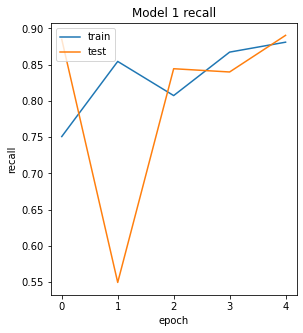

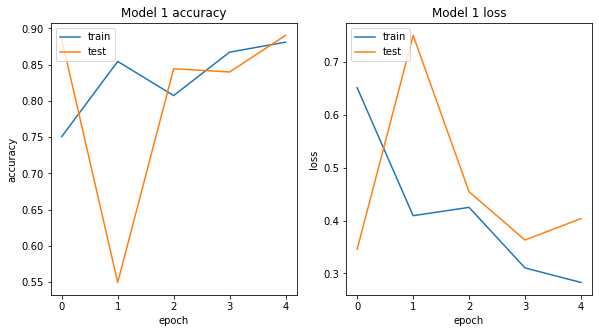

In [41]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline

# combine all the history from training together
combined1 = dict()
for key in ['recall_5','val_recall_5','accuracy','val_accuracy','loss','val_loss']:
    combined1[key] = np.hstack([x.history[key] for x in Model3_histories])

# summarize history for recall
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(combined1['recall_5'])
plt.plot(combined1['val_recall_5'])
plt.title('Model 3 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.plot(combined1['accuracy'])
plt.plot(combined1['val_accuracy'])
plt.title('Model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(133)
plt.plot(combined1['loss'])
plt.plot(combined1['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model4_Res

The last model contains the following parameters:
- 128 filters in all convolution layers
- 3x3 kernel size in the first two convolution layers as well as the middle bypassed layer
- 1x1 kernel size in the first and the last bypassed convolution layers
- 3x3 max pooling
- 256 neurons in the first dense layer

In [ ]:
lambdaReg = 0.000001

input_holder = Input(shape=(200,200,1))

x = Conv2D(filters=128,
           input_shape=(200,200,1),
           kernel_size=(3,3),
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(lambdaReg),
           padding='same',
           activation='linear',
           data_format='channels_last')(input_holder)

x = MaxPooling2D(pool_size=(3,3), data_format='channels_last')(x)

x = Conv2D(filters=64,
           kernel_size=(3,3),
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(lambdaReg),
           padding='same',
           activation='relu',
           data_format='channels_last')(x)

# save these values to add back in after the next conv. layers
x_split = MaxPooling2D(pool_size=(3,3), data_format='channels_last')(x)

x = Conv2D(filters=64,
           kernel_size=(1,1),
           kernel_initializer='he_uniform', 
           kernel_regularizer=l2(lambdaReg),
           padding='same', 
           activation='linear', 
           data_format="channels_last")(x_split)

x = Conv2D(filters=64,
           kernel_size=(3,3),
           kernel_initializer='he_uniform', 
           kernel_regularizer=l2(lambdaReg),
           padding='same', 
           activation='linear', 
           data_format="channels_last")(x)

x = Conv2D(filters=64,
           kernel_size=(1,1),
           kernel_initializer='he_uniform', 
           kernel_regularizer=l2(lambdaReg),
           padding='same', 
           activation='relu', 
           data_format="channels_last")(x)


x = Add()([x, x_split])
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(3,3), data_format='channels_last')(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(n_classes)(x)
x = Activation('softmax')(x)

Model4_Res = Model(inputs=input_holder, outputs=x, name='resnet2')

Model4_Res.summary()


In [ ]:
import tensorflow as tf

Model4_Res.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', tf.keras.metrics.Recall()])

# the flow method yields batches of images indefinitely, with the given transofmrations
Model4_histories = []
temp2 = Model4_Res.fit_generator(data_generator.flow(X_train, y_train_new, batch_size=16), 
                      steps_per_epoch=int(len(X_train)/16), # how many generators to go through per epoch
                      epochs=30, verbose=1,
                      validation_data=(X_test,y_test_new)#,
                      #callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Model4_histories.append(temp2)

In [ ]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

labels = ['normal', 'pneumonia']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

In [ ]:
summarize_net(Model1_Alex, X_test, y_test, title_text='Model 4.:')

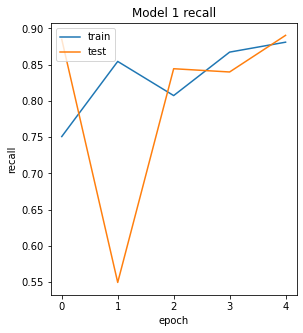

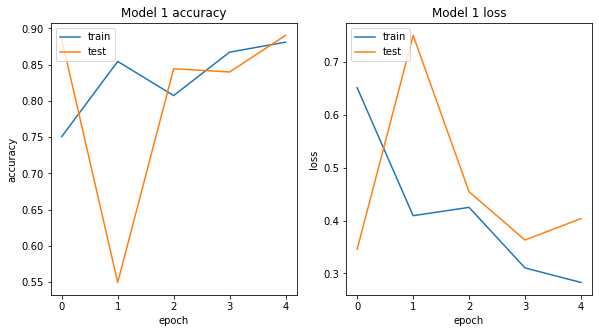

In [41]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline

# combine all the history from training together
combined1 = dict()
for key in ['recall_2','val_recall_2','accuracy','val_accuracy','loss','val_loss']:
    combined1[key] = np.hstack([x.history[key] for x in Model4_histories])

# summarize history for recall
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(combined1['recall_2'])
plt.plot(combined1['val_recall_2'])
plt.title('Model 1 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.plot(combined1['accuracy'])
plt.plot(combined1['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(133)
plt.plot(combined1['loss'])
plt.plot(combined1['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## MLP

In [ ]:
# make a 3 layer keras MLP
mlp = Sequential(name='mlp')
mlp.add(Flatten(input_shape=(h,w,n_channels)))
mlp.add(Dense(units=30, activation='relu'))
mlp.add(Dense(units=15, activation='relu'))
mlp.add(Dense(n_classes) )
mlp.add(Activation('softmax'))

mlp.summary()
